# CSE 569: Fundamentals of Statistical Learning and Pattern Recognition
## Project 2


## Part 1


Training with nH=4
Classification Accuracy for nH=4: 65.90%

Training with nH=8
Classification Accuracy for nH=8: 75.15%

Training with nH=10
Classification Accuracy for nH=10: 70.70%

Training with nH=12
Classification Accuracy for nH=12: 69.70%

Training with nH=14
Classification Accuracy for nH=14: 64.20%

Training with nH=4
Classification Accuracy for nH=4: 64.95%

Training with nH=8
Classification Accuracy for nH=8: 75.05%

Training with nH=10
Classification Accuracy for nH=10: 66.25%

Training with nH=12
Classification Accuracy for nH=12: 72.60%

Training with nH=14
Classification Accuracy for nH=14: 74.45%

Training with nH=4
Classification Accuracy for nH=4: 54.10%

Training with nH=8
Classification Accuracy for nH=8: 65.25%

Training with nH=10
Classification Accuracy for nH=10: 63.35%

Training with nH=12
Classification Accuracy for nH=12: 72.35%

Training with nH=14
Early stopping at epoch 8825. Best Validation Loss: 0.1743
Classification Accuracy for nH=14: 76.05%

Trainin

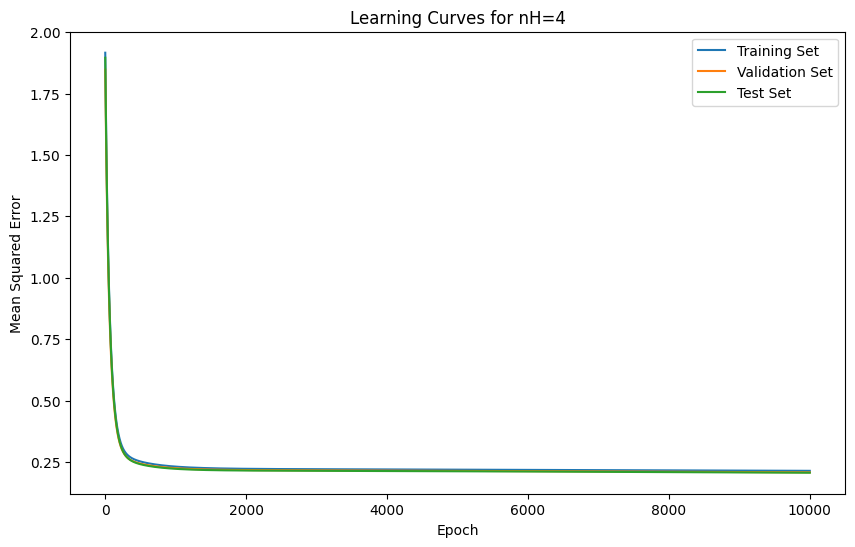

Classification Accuracy for nH=4: 63.00%

Training with nH=8
Epoch 0/10000 - Training Loss: 2.0761 - Validation Loss: 2.2246
Epoch 1000/10000 - Training Loss: 0.3169 - Validation Loss: 0.3123
Epoch 2000/10000 - Training Loss: 0.2661 - Validation Loss: 0.2576
Epoch 3000/10000 - Training Loss: 0.2422 - Validation Loss: 0.2326
Epoch 4000/10000 - Training Loss: 0.2290 - Validation Loss: 0.2193
Epoch 5000/10000 - Training Loss: 0.2204 - Validation Loss: 0.2112
Epoch 6000/10000 - Training Loss: 0.2143 - Validation Loss: 0.2058
Epoch 7000/10000 - Training Loss: 0.2097 - Validation Loss: 0.2018
Epoch 8000/10000 - Training Loss: 0.2059 - Validation Loss: 0.1987
Epoch 9000/10000 - Training Loss: 0.2026 - Validation Loss: 0.1962


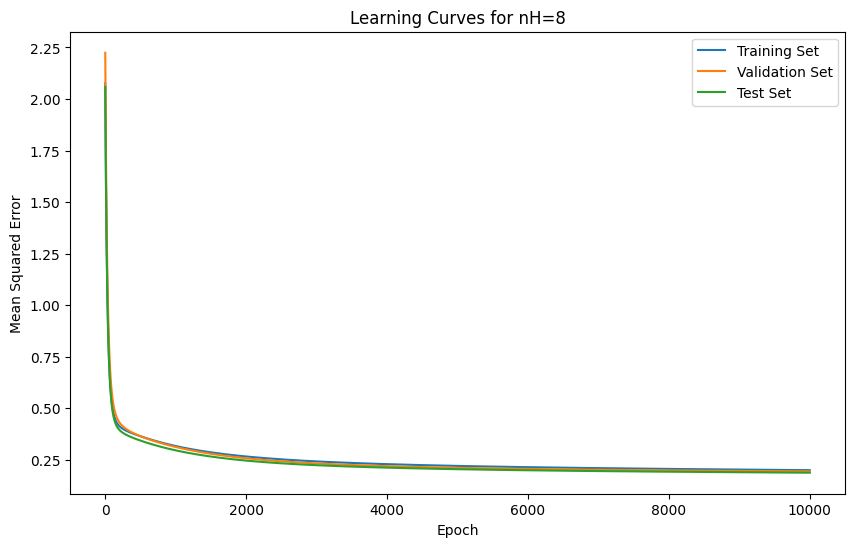

Classification Accuracy for nH=8: 68.45%

Training with nH=10
Epoch 0/10000 - Training Loss: 6.4570 - Validation Loss: 6.7176
Epoch 1000/10000 - Training Loss: 0.2935 - Validation Loss: 0.2906
Epoch 2000/10000 - Training Loss: 0.2491 - Validation Loss: 0.2455
Epoch 3000/10000 - Training Loss: 0.2315 - Validation Loss: 0.2273
Epoch 4000/10000 - Training Loss: 0.2230 - Validation Loss: 0.2184
Epoch 5000/10000 - Training Loss: 0.2174 - Validation Loss: 0.2133
Epoch 6000/10000 - Training Loss: 0.2128 - Validation Loss: 0.2095
Epoch 7000/10000 - Training Loss: 0.2090 - Validation Loss: 0.2064
Epoch 8000/10000 - Training Loss: 0.2060 - Validation Loss: 0.2042
Epoch 9000/10000 - Training Loss: 0.2035 - Validation Loss: 0.2022


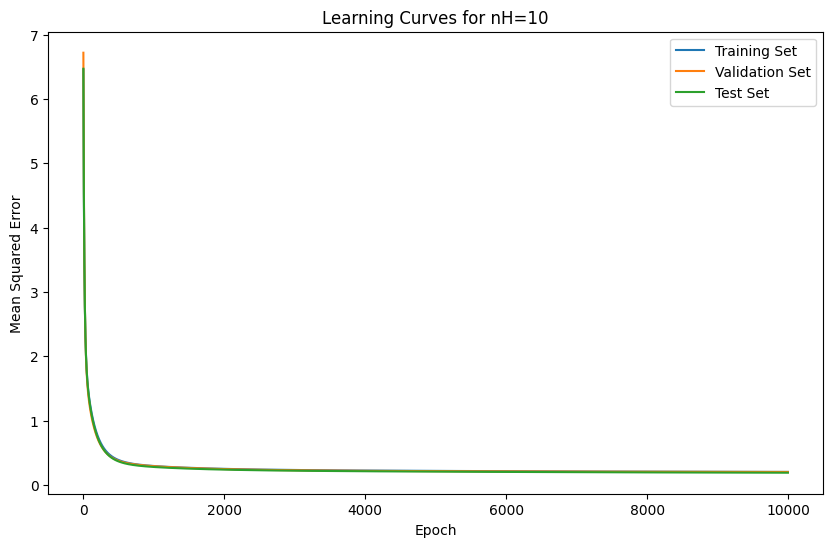

Classification Accuracy for nH=10: 66.55%

Training with nH=12
Epoch 0/10000 - Training Loss: 13.8432 - Validation Loss: 13.8268
Epoch 1000/10000 - Training Loss: 0.2538 - Validation Loss: 0.2652
Epoch 2000/10000 - Training Loss: 0.2326 - Validation Loss: 0.2452
Epoch 3000/10000 - Training Loss: 0.2233 - Validation Loss: 0.2372
Epoch 4000/10000 - Training Loss: 0.2187 - Validation Loss: 0.2328
Epoch 5000/10000 - Training Loss: 0.2172 - Validation Loss: 0.2304
Epoch 6000/10000 - Training Loss: 0.2171 - Validation Loss: 0.2294
Epoch 7000/10000 - Training Loss: 0.2176 - Validation Loss: 0.2290
Early stopping at epoch 7347. Best Validation Loss: 0.2289


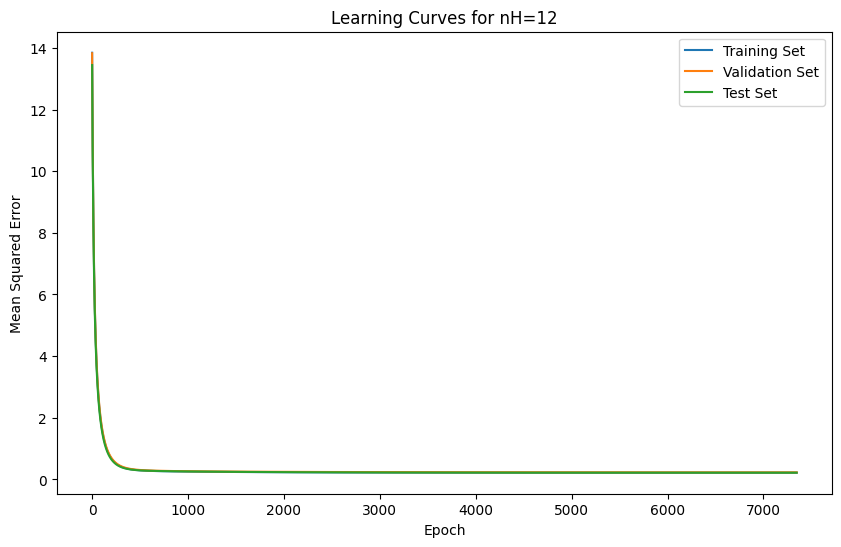

Classification Accuracy for nH=12: 67.55%

Training with nH=14
Epoch 0/10000 - Training Loss: 9.4012 - Validation Loss: 9.2257
Epoch 1000/10000 - Training Loss: 0.2164 - Validation Loss: 0.2208
Epoch 2000/10000 - Training Loss: 0.1961 - Validation Loss: 0.1999
Epoch 3000/10000 - Training Loss: 0.1870 - Validation Loss: 0.1901
Epoch 4000/10000 - Training Loss: 0.1819 - Validation Loss: 0.1845
Epoch 5000/10000 - Training Loss: 0.1788 - Validation Loss: 0.1810
Epoch 6000/10000 - Training Loss: 0.1769 - Validation Loss: 0.1787
Epoch 7000/10000 - Training Loss: 0.1755 - Validation Loss: 0.1773
Epoch 8000/10000 - Training Loss: 0.1746 - Validation Loss: 0.1764
Epoch 9000/10000 - Training Loss: 0.1740 - Validation Loss: 0.1760


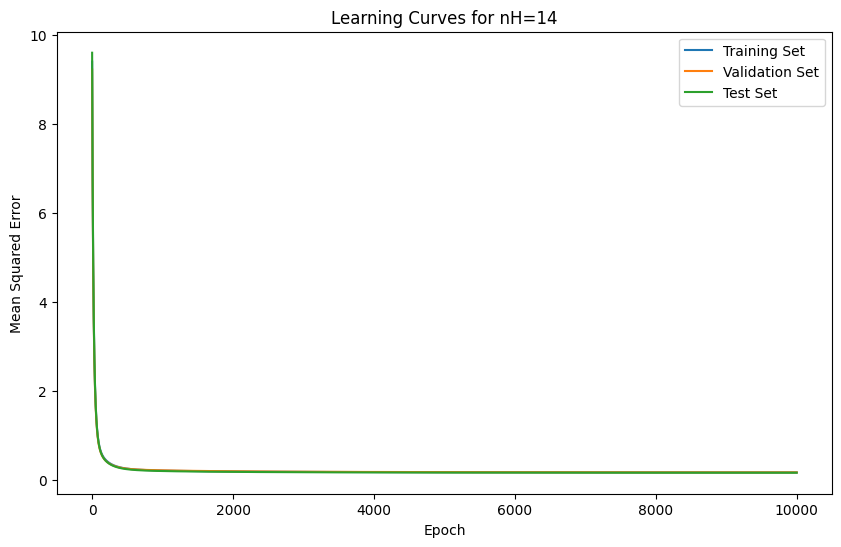

Classification Accuracy for nH=14: 76.80%


In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Define activation functions

def relu(x):
    return np.maximum(0, x)

# Define derivative of activation functions

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

# MSE loss function
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Forward pass through the network
def forward_propagation(X, parameters, activation_function):
    Z = np.dot(X, parameters['W1']) + parameters['b1']
    A = activation_function(Z)
    Y_pred = np.dot(A, parameters['W2']) + parameters['b2']
    return Z, A, Y_pred


def backward_propagation(X, Y, Z, A, Y_pred, parameters, learning_rate, activation_derivative):
    m = X.shape[0]

    # Compute gradients
    dY_pred = 2 * (Y_pred - Y) / m
    dW2 = np.dot(A.T, dY_pred)
    db2 = np.sum(dY_pred, axis=0, keepdims=True)
    dA = np.dot(dY_pred, parameters['W2'].T)
    dZ = dA * activation_derivative(Z)
    dW1 = np.dot(X.T, dZ)
    db1 = np.sum(dZ, axis=0, keepdims=True)

    # Update parameters
    parameters['W1'] -= learning_rate * dW1
    parameters['b1'] -= learning_rate * db1
    parameters['W2'] -= learning_rate * dW2
    parameters['b2'] -= learning_rate * db2

# Training the model
def train_model(X_train, Y_train, X_val, Y_val, X_test, Y_test,nH, activation_function, learning_rate=0.05, epochs=1000,iter=9):
    m, n_features = X_train.shape
    n_output = Y_train.shape[1]

    # Initialize parameters
    parameters = {
        'W1': np.random.randn(n_features, nH),
        'b1': np.zeros((1, nH)),
        'W2': np.random.randn(nH, n_output),
        'b2': np.zeros((1, n_output)),
    }

    best_val_loss = float('inf')
    learning_curve = {'train': [], 'val': [],'test':[]}

    for epoch in range(epochs):
        # Forward pass on training set
        Z_train, A_train, Y_pred_train = forward_propagation(X_train, parameters, activation_function)
        loss_train = mean_squared_error(Y_train, Y_pred_train)

        # Forward pass on validation set
        Z_val, A_val, Y_pred_val = forward_propagation(X_val, parameters, activation_function)
        loss_val = mean_squared_error(Y_val, Y_pred_val)

        # Forward pass on test set
        Z_test, A_test, Y_pred_test = forward_propagation(X_test, parameters, activation_function)
        loss_test = mean_squared_error(Y_test, Y_pred_test)

        # Backward pass and parameter update
        backward_propagation(X_train, Y_train, Z_train, A_train, Y_pred_train, parameters, learning_rate, activation_function)

        # Update learning curve
        learning_curve['train'].append(loss_train)
        learning_curve['val'].append(loss_val)
        learning_curve['test'].append(loss_test)

        # Print progress
        if epoch % 1000 == 0 and iter == 9:
            print(f"Epoch {epoch}/{epochs} - Training Loss: {loss_train:.4f} - Validation Loss: {loss_val:.4f}")

        # Early stopping based on validation loss
        if loss_val < best_val_loss:
            best_val_loss = loss_val
        else:
            print(f"Early stopping at epoch {epoch}. Best Validation Loss: {best_val_loss:.4f}")
            break

    return parameters, learning_curve


# Testing the model
def test_model(X_test, parameters, activation_function):
    _, _, Y_pred_test = forward_propagation(X_test, parameters, activation_function)
    return Y_pred_test

# Plot learning curves
def plot_learning_curves(learning_curve, nH):
    plt.figure(figsize=(10, 6))
    plt.plot(learning_curve['train'], label='Training Set')
    plt.plot(learning_curve['val'], label='Validation Set')
    plt.plot(learning_curve['test'], label='Test Set')
    plt.title(f'Learning Curves for nH={nH}')
    plt.xlabel('Epoch')
    plt.ylabel('Mean Squared Error')
    plt.legend()
    plt.show()

def load_data(file_path):
    data = []

    with open(file_path, 'r') as file:
        for line in file:
            values = line.strip().split(' ')
            data_point = [float(values[0]),float(values[2])]
            data.append(data_point)

    return np.array(data)
def normalize(sample):
	mean_columns = np.mean(sample, axis=0)
	std_dev_columns = np.std(sample, axis=0)
	std_dev_columns[std_dev_columns == 0] = 10**-10
	return (sample-mean_columns)/std_dev_columns

file_path = 'Train1.txt'
loaded_data_train1 = load_data(file_path)
file_path = 'Train2.txt'
loaded_data_train2 = load_data(file_path)
file_path = 'Test1.txt'
loaded_data_test1 = load_data(file_path)
file_path = 'Test2.txt'
loaded_data_test2 = load_data(file_path)

trainTotal = np.vstack((loaded_data_train1[:1500], loaded_data_train2[:1500]))
validateTotal = np.vstack((loaded_data_train1[1500:], loaded_data_train2[1500:]))
testTotal = np.vstack((loaded_data_test1, loaded_data_test2))

trainTotal=normalize(trainTotal)
validateTotal=normalize(validateTotal)
testTotal=normalize(testTotal)

array_1 = np.zeros(1500)
array_2 = np.full(1500, 1)
label_train = np.concatenate((array_1, array_2))
label_train = label_train.reshape(-1, 1)
array_1 = np.zeros(500)
array_2 = np.full(500, 1)
label_validation= np.concatenate((array_1, array_2))
label_validation = label_validation.reshape(-1, 1)
array_1 = np.zeros(1000)
array_2 = np.full(1000, 1)
label_test= np.concatenate((array_1, array_2))
label_test = label_test.reshape(-1, 1)
training_data = [trainTotal, label_train.reshape(-1, 1)]  # Provide your training data here
validation_data = [validateTotal, label_validation.reshape(-1, 1)]  # Provide your validation data here


# Load and normalize data
# (Assuming you have a function load_and_normalize_data that returns X_train, Y_train, X_val, Y_val, X_test)
X_train, Y_train, X_val, Y_val, X_test, Y_test = training_data[0],training_data[1],validation_data[0],validation_data[1],testTotal,label_test

# Define hyperparameters
nH_values = [4, 8, 10, 12, 14]
learning_rate = 0.001
epochs = 10000

# Train and test for each nH value
nH_values_dic = {4:[], 8:[], 10:[], 12:[], 14:[]}
for i in range(10):
  for nH in nH_values:
      print(f"\nTraining with nH={nH}\n{'='*30}")

    # Train the model
      parameters, learning_curve = train_model(X_train, Y_train, X_val, Y_val, X_test, Y_test,nH, relu, learning_rate, epochs,i)

    # Plot learning curves
      if(i==9):
        plot_learning_curves(learning_curve, nH)

    # Test the model
      Y_pred_test = test_model(X_test, parameters, relu)

    # Evaluate accuracy
      accuracy = np.mean((Y_pred_test > 0.5) == Y_test)
      nH_values_dic[nH].append(accuracy)

      print(f"Classification Accuracy for nH={nH}: {accuracy:.2%}\n{'='*30}")



In [2]:
print('Average of 10 runs for each case of nH(neurons in hidden layer)')
for i in nH_values_dic:
  accuracy = np.mean(nH_values_dic[i])
  print(f"Classification Accuracy for nH={i}: {accuracy:.2%}\n{'='*30}")


Average of 10 runs for each case of nH(neurons in hidden layer)
Classification Accuracy for nH=4: 65.91%
Classification Accuracy for nH=8: 67.84%
Classification Accuracy for nH=10: 72.10%
Classification Accuracy for nH=12: 70.38%
Classification Accuracy for nH=14: 69.15%


## Part 2

In [4]:
import numpy as np
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

In [6]:
# Load and Preprocess the MNIST Dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Expand dimensions to add a channel dimension
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

# One-hot encode the labels
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

# Build the CNN Model
model = models.Sequential()

# Convolutional layer 1
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2), strides=(1, 1)))

# Convolutional layer 2
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2), strides=(1, 1)))

# Flatten the output for fully connected layers
model.add(layers.Flatten())

# Fully connected layer 1
model.add(layers.Dense(128, activation='relu'))

# Fully connected layer 2
model.add(layers.Dense(64, activation='relu'))

# Output layer
model.add(layers.Dense(10, activation='softmax'))

# Compile and Train the Model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

# Evaluate the Model on Test Set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test Accuracy: {test_acc}')


11490434/11490434 [==============================] - 1s 0us/step


Epoch 1/5
750/750 [==============================] - 10s 13ms/step - loss: 0.1451 - accuracy: 0.9556 - val_loss: 0.0578 - val_accuracy: 0.9824
Epoch 2/5
750/750 [==============================] - 10s 13ms/step - loss: 0.0442 - accuracy: 0.9862 - val_loss: 0.0496 - val_accuracy: 0.9850
Epoch 3/5
750/750 [==============================] - 11s 14ms/step - loss: 0.0283 - accuracy: 0.9911 - val_loss: 0.0391 - val_accuracy: 0.9884
Epoch 4/5
750/750 [==============================] - 10s 14ms/step - loss: 0.0206 - accuracy: 0.9932 - val_loss: 0.0669 - val_accuracy: 0.9815
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0485 - accuracy: 0.9854
Test Accuracy: 0.9854000210762024


Experiment 1 : Change Kernel Size in the  Convolutional Layer
Expectation: Reducing the kernel size to one, so not taking into account the spatial information of the region.Larger kernel sizes may capture more complex features, potentially improving model performance.


In [7]:
import numpy as np
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

# Load and Preprocess the MNIST Dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Expand dimensions to add a channel dimension
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

# One-hot encode the labels
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

# Build the CNN Model
model = models.Sequential()

# Convolutional layer 1
model.add(layers.Conv2D(16, (10, 10), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2), strides=(1, 1)))

# Convolutional layer 2
model.add(layers.Conv2D(32, (10, 10), activation='relu'))
model.add(layers.MaxPooling2D((2, 2), strides=(1, 1)))

# Flatten the output for fully connected layers
model.add(layers.Flatten())

# Fully connected layer 1
model.add(layers.Dense(2, activation='relu'))

# Fully connected layer 2
model.add(layers.Dense(4, activation='relu'))

# Output layer
model.add(layers.Dense(10, activation='softmax'))

# Compile and Train the Model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

# Evaluate the Model on Test Set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test Accuracy: {test_acc}')


Epoch 1/5
750/750 [==============================] - 9s 11ms/step - loss: 1.6435 - accuracy: 0.3785 - val_loss: 1.3402 - val_accuracy: 0.4992
Epoch 2/5
750/750 [==============================] - 9s 12ms/step - loss: 1.0985 - accuracy: 0.5918 - val_loss: 0.8828 - val_accuracy: 0.6816
Epoch 3/5
750/750 [==============================] - 9s 12ms/step - loss: 0.7360 - accuracy: 0.7547 - val_loss: 0.5630 - val_accuracy: 0.8520
Epoch 4/5
750/750 [==============================] - 9s 12ms/step - loss: 0.4894 - accuracy: 0.8572 - val_loss: 0.4331 - val_accuracy: 0.8626
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3761 - accuracy: 0.8671
Test Accuracy: 0.8671000003814697


Experiment 2 :  Decrease the Number of Feature Maps in the First Convolutional Layer
Expectation: A decrease in the number of feature maps in a CNN reduces the network's capacity to extract diverse and discriminative features, leading to lower accuracy due to limited representational power. So here in our case we observe decrease in accuracy


In [8]:
import numpy as np
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

# Load and Preprocess the MNIST Dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Expand dimensions to add a channel dimension
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

# One-hot encode the labels
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

# Build the CNN Model
model = models.Sequential()

# Convolutional layer 1
model.add(layers.Conv2D(8, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((16, 2), strides=(1, 1)))

# Convolutional layer 2
model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2), strides=(1, 1)))

# Flatten the output for fully connected layers
model.add(layers.Flatten())

# Fully connected layer 1
model.add(layers.Dense(2, activation='relu'))

# Fully connected layer 2
model.add(layers.Dense(4, activation='relu'))

# Output layer
model.add(layers.Dense(10, activation='softmax'))

# Compile and Train the Model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

# Evaluate the Model on Test Set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test Accuracy: {test_acc}')


Epoch 1/5
750/750 [==============================] - 5s 6ms/step - loss: 1.9425 - accuracy: 0.2614 - val_loss: 1.6903 - val_accuracy: 0.3118
Epoch 2/5
750/750 [==============================] - 4s 6ms/step - loss: 1.5441 - accuracy: 0.3531 - val_loss: 1.4016 - val_accuracy: 0.4498
Epoch 3/5
750/750 [==============================] - 4s 6ms/step - loss: 1.2572 - accuracy: 0.4959 - val_loss: 1.1539 - val_accuracy: 0.5483
Epoch 4/5
750/750 [==============================] - 4s 6ms/step - loss: 1.0891 - accuracy: 0.5594 - val_loss: 1.0624 - val_accuracy: 0.5741
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.8885 - accuracy: 0.6882
Test Accuracy: 0.6881999969482422


Experiment 3: Decrease the Number of Neurons in the Fully Connected Layers
Expectation: A larger number of neurons in the fully connected layers might enable the model to learn more complex representations. So if we reduce the number of neurons so we will not be able to learn complex features.

In [9]:
import numpy as np
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

# Load and Preprocess the MNIST Dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Expand dimensions to add a channel dimension
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

# One-hot encode the labels
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

# Build the CNN Model
model = models.Sequential()

# Convolutional layer 1
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2), strides=(1, 1)))

# Convolutional layer 2
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2), strides=(1, 1)))

# Flatten the output for fully connected layers
model.add(layers.Flatten())

# Fully connected layer 1
model.add(layers.Dense(2, activation='relu'))

# Fully connected layer 2
model.add(layers.Dense(4, activation='relu'))

# Output layer
model.add(layers.Dense(10, activation='softmax'))

# Compile and Train the Model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

# Evaluate the Model on Test Set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test Accuracy: {test_acc}')


Epoch 1/5
750/750 [==============================] - 7s 9ms/step - loss: 1.5251 - accuracy: 0.4046 - val_loss: 1.1767 - val_accuracy: 0.5540
Epoch 2/5
750/750 [==============================] - 7s 9ms/step - loss: 1.0115 - accuracy: 0.6268 - val_loss: 0.8607 - val_accuracy: 0.7476
Epoch 3/5
750/750 [==============================] - 7s 9ms/step - loss: 0.7668 - accuracy: 0.7783 - val_loss: 0.6494 - val_accuracy: 0.8222
Epoch 4/5
750/750 [==============================] - 7s 9ms/step - loss: 0.6159 - accuracy: 0.8343 - val_loss: 0.5643 - val_accuracy: 0.8544
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.5207 - accuracy: 0.8699
Test Accuracy: 0.8698999881744385


Experiment 4: Learning Rate too high
Expectation: If we increase the learning rate too much, we see that instead of converging to a minima, it diverges, which we see from our result where in loss is increasing.

In [10]:
import numpy as np
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

# Load and Preprocess the MNIST Dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Expand dimensions to add a channel dimension
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

# One-hot encode the labels
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

# Build the CNN Model
model = models.Sequential()

# Convolutional layer 1
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2), strides=(1, 1)))

# Convolutional layer 2
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2), strides=(1, 1)))

# Flatten the output for fully connected layers
model.add(layers.Flatten())

# Fully connected layer 1
model.add(layers.Dense(128, activation='relu'))

# Fully connected layer 2
model.add(layers.Dense(64, activation='relu'))

# Output layer
model.add(layers.Dense(10, activation='softmax'))

# Compile and Train the Model
model.compile(optimizer=Adam(learning_rate=0.07),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

# Evaluate the Model on Test Set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test Accuracy: {test_acc}')


Epoch 1/5
750/750 [==============================] - 8s 11ms/step - loss: 5.0263 - accuracy: 0.1060 - val_loss: 2.3083 - val_accuracy: 0.1060
Epoch 2/5
750/750 [==============================] - 8s 11ms/step - loss: 2.3063 - accuracy: 0.1063 - val_loss: 2.3097 - val_accuracy: 0.0975
Epoch 3/5
750/750 [==============================] - 8s 11ms/step - loss: 2.3073 - accuracy: 0.1079 - val_loss: 2.3056 - val_accuracy: 0.1035
Epoch 4/5
750/750 [==============================] - 9s 11ms/step - loss: 2.3076 - accuracy: 0.1038 - val_loss: 2.3085 - val_accuracy: 0.0956
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 2.3094 - accuracy: 0.1135
Test Accuracy: 0.11349999904632568


Experiment 5: Change Stride in Max Pooling Layers
Expectation: Adjusting the stride in max pooling layers may affect spatial resolution. Experiment to see if changing the stride has a noticeable impact on the test accuracy.

In [11]:
import numpy as np
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

# Load and Preprocess the MNIST Dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Expand dimensions to add a channel dimension
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

# One-hot encode the labels
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

# Build the CNN Model
model = models.Sequential()

# Convolutional layer 1
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2), strides=(8, 8)))

# Convolutional layer 2
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2), strides=(1, 1)))

# Flatten the output for fully connected layers
model.add(layers.Flatten())

# Fully connected layer 1
model.add(layers.Dense(128, activation='relu'))

# Fully connected layer 2
model.add(layers.Dense(64, activation='relu'))

# Output layer
model.add(layers.Dense(10, activation='softmax'))

# Compile and Train the Model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

# Evaluate the Model on Test Set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test Accuracy: {test_acc}')


Epoch 1/5
750/750 [==============================] - 3s 4ms/step - loss: 0.8422 - accuracy: 0.7239 - val_loss: 0.4675 - val_accuracy: 0.8512
Epoch 2/5
750/750 [==============================] - 3s 3ms/step - loss: 0.4418 - accuracy: 0.8565 - val_loss: 0.3975 - val_accuracy: 0.8723
Epoch 3/5
750/750 [==============================] - 3s 4ms/step - loss: 0.3821 - accuracy: 0.8745 - val_loss: 0.3556 - val_accuracy: 0.8851
Epoch 4/5
750/750 [==============================] - 3s 3ms/step - loss: 0.3459 - accuracy: 0.8867 - val_loss: 0.3351 - val_accuracy: 0.8894
Epoch 5/5
313/313 [==============================] - 0s 863us/step - loss: 0.3454 - accuracy: 0.8891
Test Accuracy: 0.8891000151634216
